In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("westworld_episodes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     float64
 9   average_rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium_image_link    36 non-null     object 
 12  original_image_link  36 non-null     object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.8+ KB


### 1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on

In [8]:
#For overall ratings, we can use group-by function 

season_ratings = df.groupby('season')['average_rating'].mean().sort_index()

In [9]:
season_ratings

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

Text(0.5, 1.0, 'Westworld: Ratings by Season')

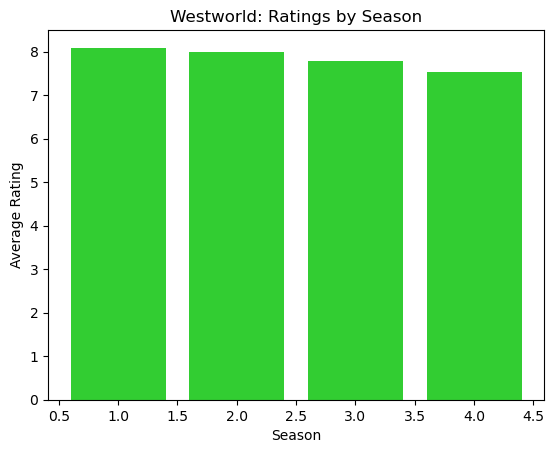

In [16]:
#It can visualize into bar plot

plt.bar(season_ratings.index, season_ratings.values, color = "limegreen")
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Westworld: Ratings by Season')

In [22]:
episode_ratings = df.groupby(['season', 'name'])['average_rating'].mean().reset_index()

# Filter episodes with average rating > 8 for each season
highly_rated_episodes = episode_ratings[episode_ratings['average_rating'] > 8]

# Get the episode names for each season with average rating > 8
episode_names = []
for season in highly_rated_episodes['season'].unique():
    season_episodes = highly_rated_episodes[highly_rated_episodes['season'] == season]
    episode_names.extend(season_episodes['name'])

for episode in episode_names:
    print(episode)


The Bicameral Mind
The Well-Tempered Clavier
Trompe L'Oeil
Kiksuya
The Passenger
Vanishing Point


In [28]:
# plt.figure(figsize=(12, 6))
# for season in highly_rated_episodes['season'].unique():
#     season_episodes = highly_rated_episodes[highly_rated_episodes['season'] == season]
#     plt.bar(season_episodes['name'], season_episodes['average_rating'], label=f"season {season}")

# # Customize the plot
# plt.xlabel('Episode')
# plt.ylabel('Average Rating')
# plt.title('Westworld: Highly Rated Episodes')
# plt.legend()

In [25]:
df

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60.0,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60.0,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60.0,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60.0,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90.0,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### 3. Get all the episode names that aired before May 2019

In [26]:
#First need to convert airdate column into datetime format

df['airdate'] = pd.to_datetime(df['airdate'])

In [27]:
episode_names = df[df['airdate'] < pd.Timestamp('2019-05-01')]

# Get the episode names
episode_names = episode_names['name'].tolist()

# Print the episode names
for episode_name in episode_names:
    print(episode_name)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


### 4 Get the episode name from each season with the highest and lowest rating

In [32]:
#highest rating group by
highest_ratings = df.groupby('season')['average_rating'].idxmax()
highest_episodes = df.loc[highest_ratings, ['season', 'name', 'average_rating']]

#lowest rating group by
lowest_ratings = df.groupby('season')['average_rating'].idxmin()
lowest_episodes = df.loc[lowest_ratings, ['season', 'name', 'average_rating']]

# Print the episode names 
for season in df['season'].unique():
    highest_rating = highest_episodes[highest_episodes['season'] == season]
    lowest_rating = lowest_episodes[lowest_episodes['season'] == season]
    
    print(f"Season {season}:")
    print("Highest Rated Episode:")
    print(f"Episode Name: {highest_rating['name'].values[0]}")
    print(f"Rating: {highest_rating['average_rating'].values[0]}")
    
    print("Lowest Rated Episode:")
    print(f"Episode Name: {lowest_rating['name'].values[0]}")
    print(f"Rating: {lowest_rating['average_rating'].values[0]}")
    print()

Season 1:
Highest Rated Episode:
Episode Name: The Bicameral Mind
Rating: 8.7
Lowest Rated Episode:
Episode Name: The Stray
Rating: 7.6

Season 2:
Highest Rated Episode:
Episode Name: Kiksuya
Rating: 8.7
Lowest Rated Episode:
Episode Name: Akane No Mai
Rating: 7.6

Season 3:
Highest Rated Episode:
Episode Name: Parce Domine
Rating: 8.0
Lowest Rated Episode:
Episode Name: Decoherence
Rating: 7.5

Season 4:
Highest Rated Episode:
Episode Name: Zhuangzi
Rating: 7.8
Lowest Rated Episode:
Episode Name: The Auguries
Rating: 7.1



### 5.  Get the summary for the most popular ( ratings ) episode in every season

In [37]:
most_popular_episode = df.groupby('season').apply(lambda x: x[x['average_rating'] == x['average_rating'].max()])

# Print the summary for the most popular episode in each season
for season, episode in most_popular_episode.iterrows():
    print(f"Season no {season}:")
    print("Episode Name:", episode['name'])
    print("")
    print("Rating:", episode['average_rating'])
    print("Summary:", episode['summary'])
    print()

Season no (1, 9):
Episode Name: The Bicameral Mind

Rating: 8.7
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season no (2, 17):
Episode Name: Kiksuya

Rating: 8.7
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season no (3, 20):
Episode Name: Parce Domine

Rating: 8.0
Summary: If you're stuck in a loop, try walking in a straight line.

Season no (3, 23):
Episode Name: The Mother of Exiles

Rating: 8.0
Summary: The truth doesn't always set you free.

Season no (4, 32):
Episode Name: Zhuangzi

Rating: 7.8
Summary: God is bored.

